In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-adds-csv/social_ads.csv


In [11]:
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("/kaggle/input/social-adds-csv/social_ads.csv")

In [13]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


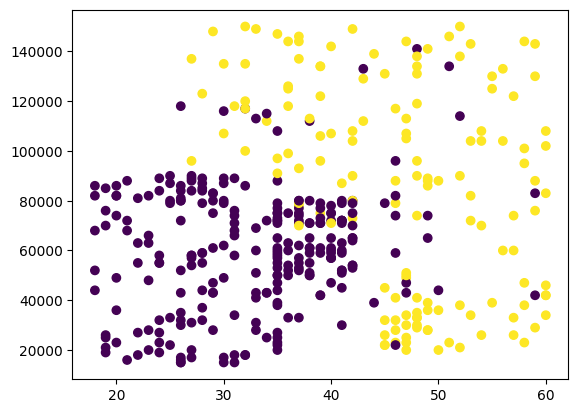

In [15]:
plt.scatter(df['Age'],df['EstimatedSalary'],c=df['Purchased'])

In [16]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [17]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

2026-02-01 16:08:39.040321: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1769962119.271804      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1769962119.337887      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1769962119.853071      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1769962119.853120      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1769962119.853123      55 computation_placer.cc:177] computation placer alr

In [34]:
model =Sequential()
model.add(Dense(1,activation ='ReLu',input_dim=2))
model.add(Dense(1,activation ='ReLu'))
model.summary()

ValueError: Could not interpret activation function identifier: ReLu

In [20]:
model.get_weights()

[array([[ 0.03634989, -0.9448123 ],
        [ 1.0287875 ,  0.10056925]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.6756835 ,  0.4815544 ],
        [-0.47720975,  0.4404043 ]], dtype=float32),
 array([0., 0.], dtype=float32)]

In [21]:

initial_weights = model.get_weights()

In [22]:
model.set_weights(initial_weights)

In [28]:
initial_weights[0] = np.ones(model.get_weights()[0].shape)*0.5
initial_weights[1] = np.ones(model.get_weights()[1].shape)*0.5
initial_weights[2] = np.ones(model.get_weights()[2].shape)*0.5
initial_weights[3] = np.ones(model.get_weights()[3].shape)*0.5

In [29]:
model.get_weights()

[array([[ 0.03634989, -0.9448123 ],
        [ 1.0287875 ,  0.10056925]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.6756835 ,  0.4815544 ],
        [-0.47720975,  0.4404043 ]], dtype=float32),
 array([0., 0.], dtype=float32)]

In [30]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [31]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(32,), output.shape=(32, 2)